In [1]:
import sys
sys.path.append('..')

In [70]:
import pandas as pd
from datetime import datetime

In [69]:
from app import PriceDataScrapper

In [3]:
scrapper = PriceDataScrapper()

# Take APPLE

In [121]:
aapl_data = scrapper.get_data('AAPL',period1=0,period2=9999999999,interval='1mo',prepost='false',events=None)

In [122]:
print(aapl_data)
aapl_json = aapl_data.json()

<Response [200]>


In [123]:
aapl_open = aapl_json['chart']['result'][0]['indicators']['quote'][0]['open']
aapl_close = aapl_json['chart']['result'][0]['indicators']['quote'][0]['close']
aapl_time = aapl_json['chart']['result'][0]['timestamp']

In [124]:
len(aapl_time)==len(aapl_close) and len(aapl_time)==len(aapl_open)

True

In [125]:
aapl_date=[datetime.utcfromtimestamp(time) for time in aapl_time]

In [126]:
# type(aapl_date[0])

### Plot data

In [127]:
import matplotlib
from matplotlib import pyplot as plt

In [128]:
dates = matplotlib.dates.date2num(aapl_date)

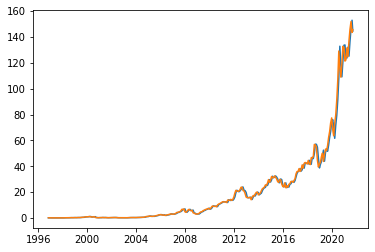

In [132]:
plt.plot(aapl_date,aapl_open)
plt.plot(aapl_date,aapl_close)

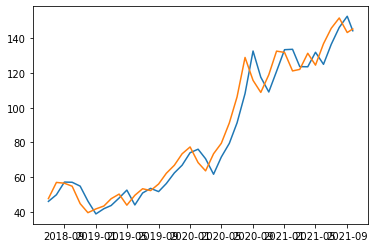

In [153]:
start, shift = 260,40
plt.plot(aapl_date[start:start+shift],aapl_open[start:start+shift],'-')
plt.plot(aapl_date[start:start+shift],aapl_close[start:start+shift],'-')

# Take GAZPROM

In [167]:
gaz_data = scrapper.get_data('OGZPY',period1=0,period2=9999999999,interval='1mo',prepost='false',events=None)

In [168]:
print(gaz_data)
gaz_json = gaz_data.json()

<Response [200]>


In [169]:
gaz_open = gaz_json['chart']['result'][0]['indicators']['quote'][0]['open']
gaz_close = gaz_json['chart']['result'][0]['indicators']['quote'][0]['close']
gaz_time = gaz_json['chart']['result'][0]['timestamp']

In [170]:
len(gaz_time)==len(gaz_close) and len(gaz_time)==len(gaz_open)

True

In [171]:
gaz_date=[datetime.utcfromtimestamp(time) for time in gaz_time]

### Plot data

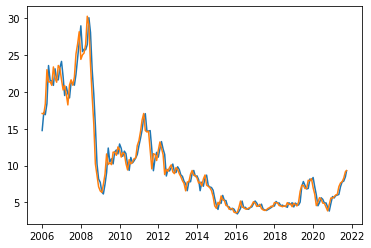

In [172]:
plt.plot(gaz_date,gaz_open)
plt.plot(gaz_date,gaz_close)

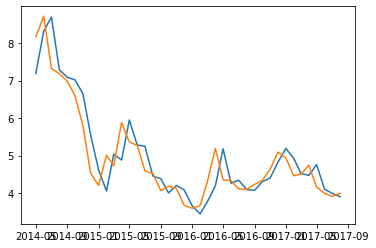

In [175]:
start, shift = 100,40
plt.plot(gaz_date[start:start+shift],gaz_open[start:start+shift],'-')
plt.plot(gaz_date[start:start+shift],gaz_close[start:start+shift],'-')

# Take APPLE once more

In [176]:
aapl_data = scrapper.get_data('AAPL',period1=0,period2=9999999999,interval='1mo',prepost='false',events=None)

In [177]:
print(aapl_data)
aapl_json = aapl_data.json()

<Response [200]>


In [179]:
aapl_json['chart']['result'][0]['indicators']['quote'][0].keys()

dict_keys(['low', 'volume', 'open', 'high', 'close'])

In [180]:
aapl_open = aapl_json['chart']['result'][0]['indicators']['quote'][0]['open']
aapl_close = aapl_json['chart']['result'][0]['indicators']['quote'][0]['close']
aapl_low = aapl_json['chart']['result'][0]['indicators']['quote'][0]['low']
aapl_high = aapl_json['chart']['result'][0]['indicators']['quote'][0]['high']
aapl_time = aapl_json['chart']['result'][0]['timestamp']

In [182]:
len(aapl_time)==len(aapl_close) and len(aapl_time)==len(aapl_open) and len(aapl_time)==len(aapl_low) and len(aapl_time)==len(aapl_high)

True

In [183]:
aapl_date=[datetime.utcfromtimestamp(time) for time in aapl_time]

In [184]:
# type(aapl_date[0])

### Plot data

In [245]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

In [186]:
dates = matplotlib.dates.date2num(aapl_date)

In [195]:
start,shift=160,40

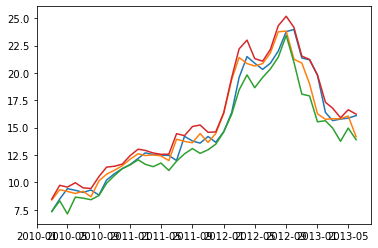

In [196]:
plt.plot(aapl_date[start:start+shift],aapl_open[start:start+shift])
plt.plot(aapl_date[start:start+shift],aapl_close[start:start+shift])
plt.plot(aapl_date[start:start+shift],aapl_low[start:start+shift])
plt.plot(aapl_date[start:start+shift],aapl_high[start:start+shift])

# Assemble all cells in a function

In [207]:
import time

In [211]:
def to_unix_ts(ts):
    return int(time.mktime(ts.timetuple()))

In [257]:
def print_price_data(tickers,period1,period2,interval, price_types=['open','close','low','high']):
    for ticker in tickers:
        print_price_data_by_ticker(ticker,period1,period2,interval, price_types)
        
        
def print_price_data_by_ticker(ticker,period1,period2,interval, price_types=['open','close','low','high']):
    data = scrapper.get_data(ticker,period1=to_unix_ts(period1),period2=to_unix_ts(period2),interval=interval,prepost='false',events=None)
    data_json = data.json()
    
    d_time = data_json['chart']['result'][0]['timestamp']
    
    d_date=[datetime.utcfromtimestamp(time) for time in d_time]
    
    fig, ax = plt.subplots()
    
    for price_type in price_types:
        d_price_type = data_json['chart']['result'][0]['indicators']['quote'][0][price_type]
        ax.plot(d_date,d_price_type)
    fig.suptitle(f'{ticker} {period1.strftime("%d.%m.%Y, %H:%M:%S")}->{period2.strftime("%d.%m.%Y, %H:%M:%S")}')
    fig.autofmt_xdate()

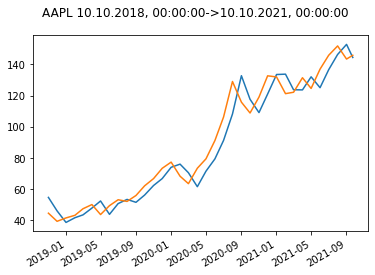

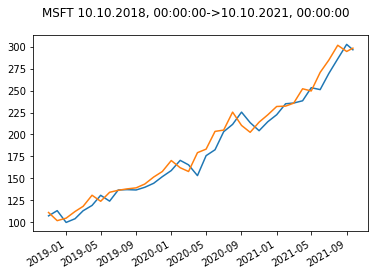

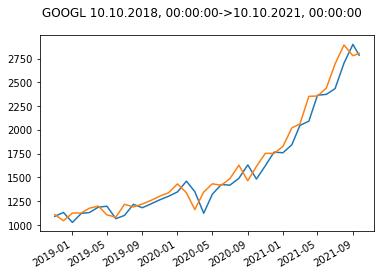

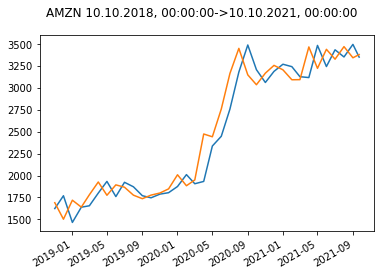

In [258]:
start_date=datetime(2018,10,10)
end_date=datetime(2021,10,10)

print_price_data(['AAPL','MSFT','GOOGL','AMZN'],start_date,end_date,'1mo',['open','close'])

# Crypto

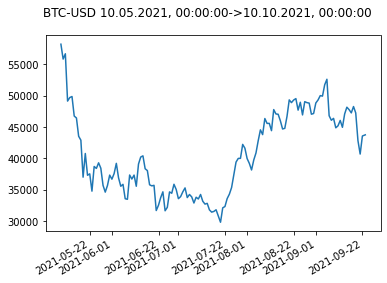

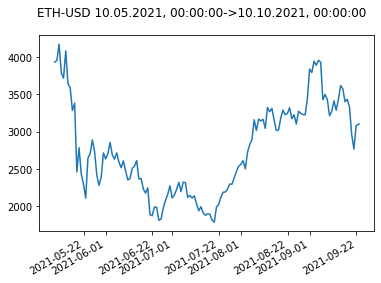

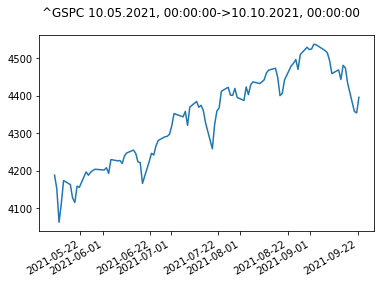

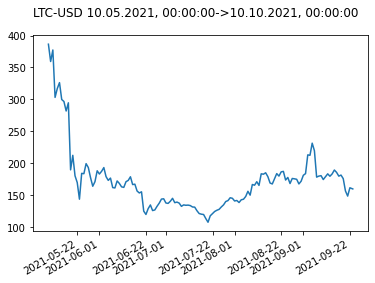

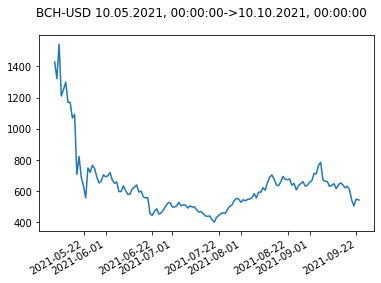

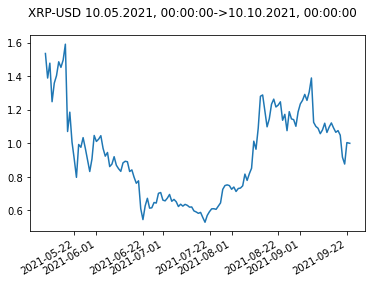

In [273]:
start_date=datetime(2021,5,10)
end_date=datetime(2021,10,10)

print_price_data(['BTC-USD','ETH-USD','^GSPC','LTC-USD','BCH-USD','XRP-USD'],start_date,end_date,'1d',['close'])

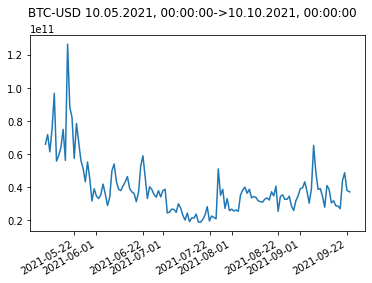

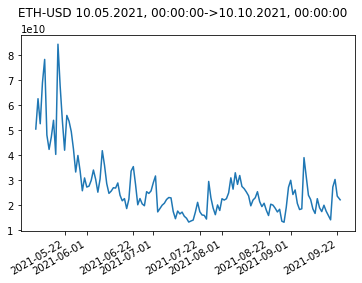

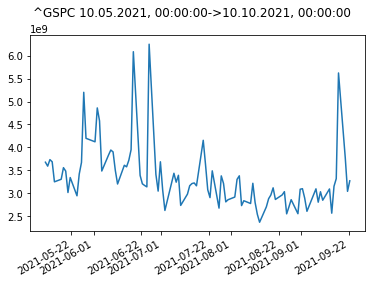

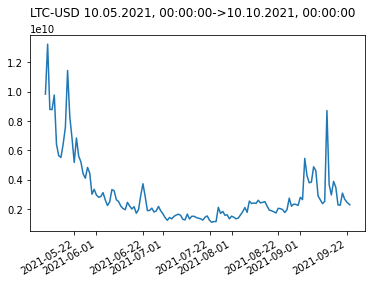

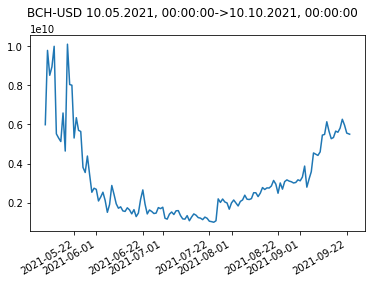

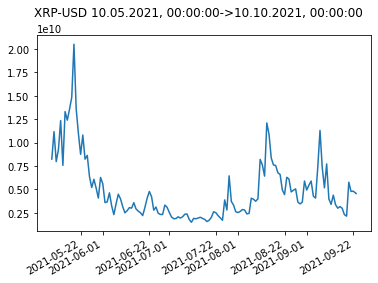

In [274]:
start_date=datetime(2021,5,10)
end_date=datetime(2021,10,10)

print_price_data(['BTC-USD','ETH-USD','^GSPC','LTC-USD','BCH-USD','XRP-USD'],start_date,end_date,'1d',['volume'])